<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/intro-Machine-Learning/blob/main/classes/class_16_end_to_end_1/class_16_end_to_end_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

## [Video de apoyo a la lectura de esta clase](https://www.youtube.com/watch?v=4JDqj1NT4Qk)

Pasos para creación del cuaderno interactivo.

1. Plantear bien la pregunta.
   * ¿Regresión o clasificación?
   * ¿Tipo de regresión y tipo de clasificación?
2. Exploración inicial.
   * Indicar la fuente de dónde se toman los datos.
   * Hacer explícita la función objetivo.
   * Decir cuáles son los atributos (descripción breve de cada uno)
   * Practicar una primera exploración gráfica de los datos.
3. Preparar los datos para los algoritmos de aprendizaje.
   * Hacer separación inicial de datos para entrenar y para testear.
   * Limpiar datos y llenar datos faltantes.
   * Explorar correlaciones lineales con la variable objetivo.
   * Eliminar de ser necesario atributos que no sean de mucha utilidad.
   * Ingeniería de atributos.
   * Estandarizar los datos.
   * Crear funciones en Python de manera que se puedan replicar los procesos de transformación de datos en proyectos nuevos.
4. Entrenamiento y selección de modelo.
   * Instanciar varios modelos y entrenarlos sobre datos de entrenamiento preparados.
   * Medir el desempeño de varios modelos (comparativa, con la técnica de la validación cruzada)
5. Afinar el modelo.
   * Crear cuadrícula (de búsqueda) de hiperparámetros.
   * Seleccionar la combinación de hiperparámetros que consigue el mejor puntaje. (El mejor modelo).
6. Presentar la solución.
   * Mostrar el desempeño sobre los datos para testear.
   * (Opcional) Gráfico intuitivo para representar el modelo.
7. (Opcional) ¿Cómo se sacará provecho del modelo en otros proyectos?

# Implementación del plan 

1. Plantear bien la pregunta.
   * ¿Regresión o clasificación?
   * ¿Tipo de regresión y tipo de clasificación?

Este es un problema de regresión porque lo que se trata es de predecir un valor o la función predictora es una función de valor continuo o de valores en un intervalo de números reales. 

El tipo de regresión es lineal porque 

$$h(x_{i}) = w_{0} + w_{1}x_{i1} + \cdots + w_{n}x_{in} $$

donde $n$ es el número de atributos. 



# 2. Exploración inicial.

##  Indicar la fuente de dónde se toman los datos.

Su primera tarea es utilizar los datos del censo de California para construir un modelo de precios de viviendas en el estado.

Estos datos incluyen métricas como la población, el ingreso medio y el precio medio de la vivienda para cada grupo de bloques en California.

Los grupos de bloques son la unidad geográfica más pequeña para la que la Oficina del Censo de EE. UU. publica datos de muestra (un grupo de bloques suele tener una población de 600 a 3000 personas).

Los llamaremos “distritos” para abreviar.

Su modelo debe aprender de estos datos y poder predecir el precio medio de la vivienda en cualquier distrito, dadas todas las demás métricas.

# Hacer explícita la función objetivo.

$$ h:\mathbb{R}^{9} \to \mathbb{R} $$

$$ h(X) = y $$

donde $X$ es una matriz alta (número de filas nucho mayor al número de columnas). 

$y$ es un vector de $\mathbb{R}^{n}$ cuyas entradas son los valores promedio de vivienda por distrito. 

$$ h(x_{i}) = y_{i} $$

## Decir cuáles son los atributos (descripción breve de cada uno)

Son nueve atributos o variables predictoras entre las que están:

* longitud
* latitud
* habitaciones
* dormitorios
* ingresos promedio
* proximidad al oceano
* antiguedad promedio de las viviendas en el distrito.
* Número de hogares
* población


## Practicar una primera exploración gráfica de los datos.

In [1]:
import pandas as pd 

In [2]:
v = pd.read_csv('vivienda.csv')  

In [3]:
v.head() 

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,valor
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


In [4]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitud      20640 non-null  float64
 1   latitud       20640 non-null  float64
 2   antiguedad    20640 non-null  float64
 3   habitaciones  20640 non-null  float64
 4   dormitorios   20433 non-null  float64
 5   población     20640 non-null  float64
 6   hogares       20640 non-null  float64
 7   ingresos      20640 non-null  float64
 8   proximidad    20640 non-null  object 
 9   valor         20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
v.proximidad.value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: proximidad, dtype: int64

In [6]:
v.describe() 

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,valor
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


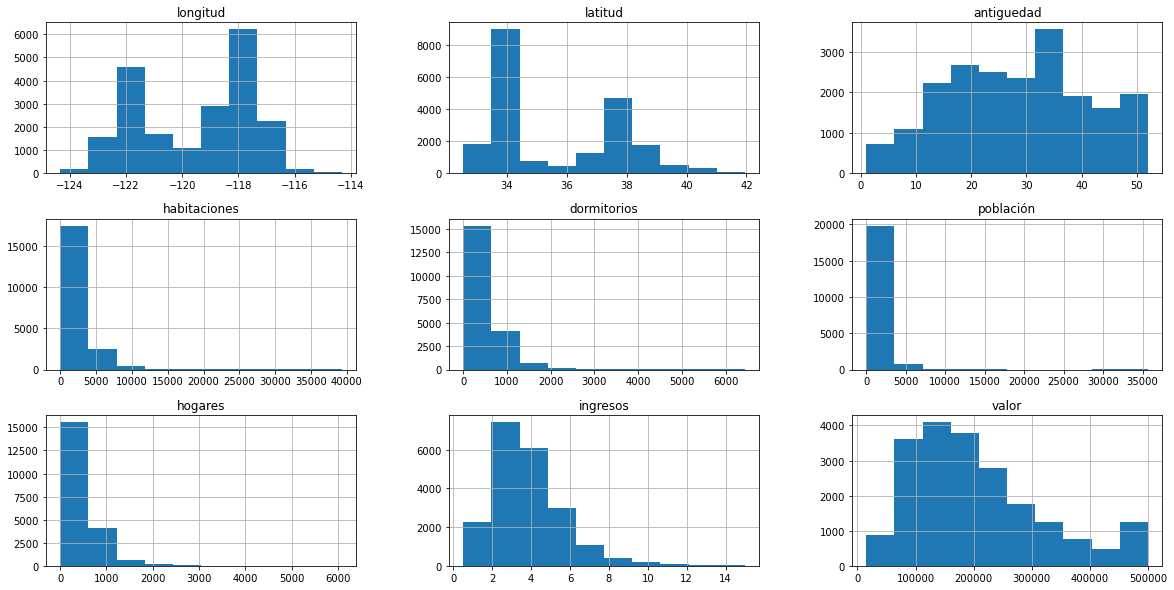

In [7]:
import matplotlib.pyplot as plt

v.hist(figsize = (20,10))

plt.show() 

## Visualización de datos geográficos 


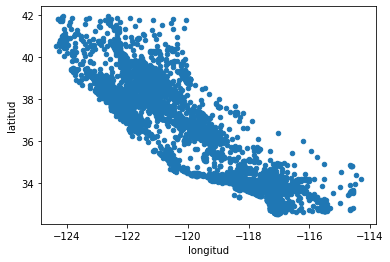

In [9]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 1)

plt.show() 

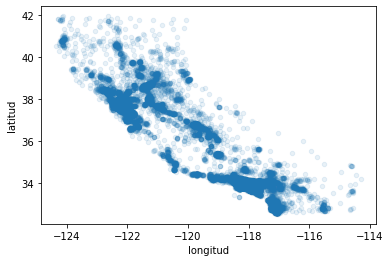

In [10]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.1) 

plt.show() 

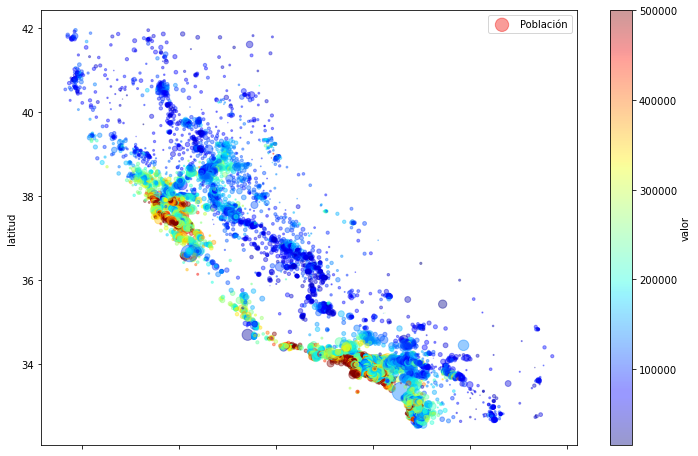

In [14]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.4, \
      s = v.población/100, label = 'Población', \
      c = 'valor', cmap = plt.get_cmap('jet'), colorbar = True, figsize = (12, 8))  

# s de size o tamaño del punto. 

plt.show() 

# 3. Preparar los datos para los algoritmos de aprendizaje.

## Hacer separación inicial de datos para entrenar y para testear.

In [23]:
import numpy as np 
np.random.seed(42)

def dividir_entrenamiento_testeo(datos, porcentaje_testeo):
    indices_reordenados = np.random.permutation(len(datos))
    tamaño_conjunto_testeo = int(len(datos)*porcentaje_testeo)
    indices_entrenamiento = indices_reordenados[tamaño_conjunto_testeo:]
    indices_testeo = indices_reordenados[:tamaño_conjunto_testeo]
    return datos.iloc[indices_entrenamiento], datos.iloc[indices_testeo]

In [20]:
v_train, v_test = dividir_entrenamiento_testeo(v, 0.2)

In [21]:
len(v_train), len(v_test) 

(16512, 4128)

In [22]:
len(v_train)/len(v_test) 


4.0

In [24]:
from sklearn.model_selection import train_test_split

v_train, v_test = train_test_split(v, test_size = 0.2, random_state = 42)

## Limpiar datos y llenar datos faltantes.

   * Explorar correlaciones lineales con la variable objetivo.
   * Eliminar de ser necesario atributos que no sean de mucha utilidad.
   * Ingeniería de atributos.
   * Estandarizar los datos.
   * Crear funciones en Python de manera que se puedan replicar los procesos de transformación de datos en proyectos nuevos.

In [ ]:
def dividir_train_test(datos, porcentaje_testeo):
    import numpy as np 
    indices_reordenados = np.random.permutation(len(v))
    return indices_reordenados[:5]

In [ ]:
dividir_train_test(v,0.2) 

In [ ]:
def dividir_train_test(datos, porcentaje_testeo):
    import numpy as np 
    indices_reordenados = np.random.permutation(len(v))
    tamaño_entrenamiento = int(len(v)*(1-porcentaje_testeo))
    train_set = v.iloc[indices_reordenados[:tamaño_entrenamiento]]
    test_set = v.iloc[indices_reordenados[tamaño_entrenamiento:]]
    return train_set, test_set

In [ ]:
v_train, v_test = dividir_train_test(v,0.2) 

In [ ]:
v_train.head() 

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
v_train, v_test = train_test_split(v,test_size = 0.2,random_state = 42)

## Establecer correlaciones 

<img src = ''>

In [ ]:
matriz_correlación = v.corr() 

In [ ]:
matriz_correlación

In [ ]:
matriz_correlación.valor.sort_values(ascending = False) 

In [ ]:
from pandas.plotting import scatter_matrix

atributos = ['valor', 'ingresos', 'salas', 'antiguedad','longitud', 'latitud'] 

scatter_matrix(v[atributos], figsize = (20,10)) 
plt.show() 

In [ ]:
v.plot(kind = 'scatter', x = 'ingresos', y = 'valor')  

# Experimentación con combinación de atributos 

Con suerte, las secciones anteriores le dieron una idea de algunas formas en que puede explorar los datos y obtener información.

Identificó algunas peculiaridades de los datos que quizás desee limpiar antes de enviar los datos a un algoritmo de aprendizaje automático y encontró correlaciones interesantes entre los atributos, en particular con el atributo de destino.

También notó que algunos atributos tienen una distribución de cola pesada, por lo que es posible que desee transformarlos (por ejemplo, calculando su logaritmo).

Por supuesto, su millaje variará considerablemente con cada proyecto,
pero las ideas generales son similares

Una última cosa que quizás desee hacer antes de preparar los datos para los algoritmos de Machine Learning es probar varias combinaciones de atributos.

Por ejemplo, el número total de habitaciones en un distrito no es muy útil si no sabe cuántos hogares hay. Lo que realmente desea es el número de habitaciones por hogar. Del mismo modo, el número total de dormitorios por sí solo no es muy útil:
probablemente quieras compararlo con el número de habitaciones.

Y la población por hogar también parece una combinación de atributos interesante para observar.

Vamos a crear estos nuevos atributos:

In [ ]:
v["salas_por_hogar"] = v["salas"]/v["hogares"]

In [ ]:
v["habitaciones_por_sala"] = v["habitaciones"]/v["salas"]

In [ ]:
v["población_por_hogar"]=v["población"]/v["hogares"] 

And now let’s look at the correlation matrix again:

In [ ]:
corr_matrix = v.corr()
corr_matrix['valor'].sort_values(ascending=False)

## Tiempos 

1. Clase 17: 
   * Construir en dataframe y sistetizar la información y visualizarla 
   * división en entrenamiento y testeo.
   * Establecer corralaciones y definir nuevos atributos.

2. Calse 18
   * imputar los datos faltantes
   * escalar los datos
   * entrenar el modelo lineal
   * medir su desempeño. 